libraries

In [2]:
%run import_modules.py  
%matplotlib inline

# For DNN modeling
import tensorflow as tf

# Tensorflow warning off
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
tf.random.set_seed(2020)
import keras
from keras import backend as K
from keras.layers import * #Input, Dense
from keras.models import * #Model
from keras.optimizers import *
from keras.initializers import *
from keras.regularizers import *
from keras.utils.np_utils import *
from keras.utils.vis_utils import * #model_to_dot

Using TensorFlow backend.


load data

In [3]:
X_train, X_test, y_train, y_test, X_dep, ID_dep = pd.read_pickle('case3_train_test.pkl')

X_train.shape, X_test.shape

((2450, 62), (1050, 62))

In [4]:
i = int(round(X_train.shape[0] * 0.8, 0))
X_valid, y_valid = X_train[i:], y_train[i:]
X_train, y_train = X_train[:i], y_train[:i]

model architecture

In [5]:
seed = 1
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

In [6]:
input = Input(shape=(X_train.shape[1],))
x = Dense(16, activation='relu')(input)
x = Dropout(0.3)(x)
x = Dense(8, activation='relu')(x)
x = Dropout(0.2)(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(input, output)

In [9]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 62)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                1008      
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dropout_2 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________

choose the optimizer and the cost function

In [13]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

train the model

In [17]:
callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=25)]

In [39]:
hist = model.fit(X_train, y_train, validation_data=(X_valid, y_valid),
                batch_size=64, epochs=200, callbacks=callbacks, verbose=2)

Train on 1960 samples, validate on 490 samples
Epoch 1/200
 - 0s - loss: 0.3102 - acc: 0.8536 - val_loss: 1.0803 - val_acc: 0.7265
Epoch 2/200
 - 0s - loss: 0.3072 - acc: 0.8617 - val_loss: 1.0806 - val_acc: 0.7306
Epoch 3/200
 - 0s - loss: 0.3090 - acc: 0.8622 - val_loss: 1.0938 - val_acc: 0.7306
Epoch 4/200
 - 0s - loss: 0.3257 - acc: 0.8444 - val_loss: 1.0874 - val_acc: 0.7245
Epoch 5/200
 - 0s - loss: 0.3167 - acc: 0.8531 - val_loss: 1.0992 - val_acc: 0.7306
Epoch 6/200
 - 0s - loss: 0.3271 - acc: 0.8474 - val_loss: 1.0871 - val_acc: 0.7347
Epoch 7/200
 - 0s - loss: 0.3180 - acc: 0.8612 - val_loss: 1.0966 - val_acc: 0.7286
Epoch 8/200
 - 0s - loss: 0.3219 - acc: 0.8500 - val_loss: 1.0970 - val_acc: 0.7204
Epoch 9/200
 - 0s - loss: 0.3067 - acc: 0.8658 - val_loss: 1.1054 - val_acc: 0.7265
Epoch 10/200
 - 0s - loss: 0.3154 - acc: 0.8643 - val_loss: 1.1020 - val_acc: 0.7224
Epoch 11/200
 - 0s - loss: 0.3137 - acc: 0.8541 - val_loss: 1.1077 - val_acc: 0.7224
Epoch 12/200
 - 0s - loss: 

visualize training history

In [40]:
hist.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

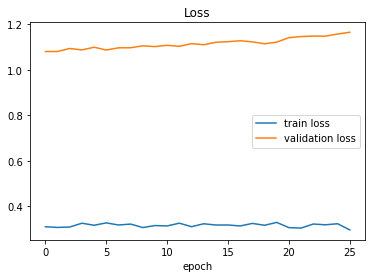

In [41]:
plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend()
plt.xlabel('epoch')
plt.title('Loss')
plt.show()

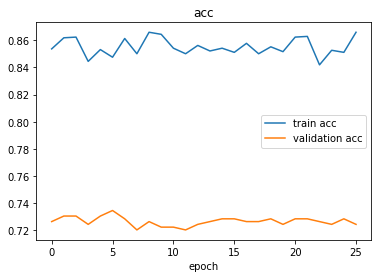

In [42]:
plt.plot(hist.history['acc'], label='train acc')
plt.plot(hist.history['val_acc'], label='validation acc')
plt.legend()
plt.xlabel('epoch')
plt.title('acc')
plt.show()

evaluate the model performance

In [43]:
model.evaluate(X_test, y_test)

1050/1050 [==============================] - 0s 12us/step


[1.4035408215295702, 0.6580952405929565]

In [44]:
roc_auc_score(y_test, model.predict(X_test))

0.6978227596384575

predict unseen data

In [47]:
model.predict(X_dep).shape

(2482, 1)

In [46]:
model.predict(X_dep)

array([[8.8337249e-01],
       [6.2584877e-07],
       [2.4160340e-01],
       ...,
       [8.9076996e-01],
       [6.0648825e-02],
       [5.7417983e-01]], dtype=float32)

In [48]:
model.predict(X_dep).flatten()

array([8.8337249e-01, 6.2584877e-07, 2.4160340e-01, ..., 8.9076996e-01,
       6.0648825e-02, 5.7417983e-01], dtype=float32)

In [49]:
model.predict(X_dep).flatten().shape

(2482,)

In [53]:
# get class labels
np.where(model.predict(X_dep) > 0.5, 1, 0).flatten()

array([1, 0, 0, ..., 1, 0, 1])

In [54]:
# make submissions

pd.DataFrame({'cust_id': ID_dep, 'gender': model.predict(X_dep).flatten()})

,cust_id,gender
0,3500,8.833725e-01
1,3501,6.258488e-07
2,3502,2.416034e-01
3,3503,1.608026e-01
4,3504,5.221696e-01
...,...,...
2477,5977,3.008423e-01
2478,5978,1.833051e-02
2479,5979,8.907700e-01
2480,5980,6.064883e-02


save the model for future use

In [55]:
# pickle 형식으로 저장
with open('nm_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [56]:
# 추후 저장한 모형 불러올 때
model = pd.read_pickle('nm_model.pkl')

In [58]:
# h5 형식으로 저장
model.save('nm_model.h5')

In [59]:
# 추후 저장한 모형 불러올 때
model = load_model('nm_model.h5')

1. libraries, read data     
2. data engineering   
3. model architecture, choose the optimizer and the cost function, train the model   
4. visualize training history, evaluate the model performance   
5. predict unseen data, save the model for future use   